## Data Generation

### created by Yuying Liu, 04/30/2020

This script is used for generating data sets for multiscale HiTS experiments. Here, we consider 5 nonlinear systems: a hyperbolic fixed point, a damped cubic oscillator, the Van der Pol oscillator, a Hopf normal form, and the Lorenz system. Simulations are conducted using scipy.integrate.solve_ivp() and considered as ground truth.

In [6]:
import os
import numpy as np
import scipy as sp
from scipy import integrate
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch

In [7]:
# paths
data_dir = '../../data/toy1'
# hyperbolic_dir = os.path.join(data_dir, 'Hyperbolic')
# cubic_dir = os.path.join(data_dir, 'Cubic')
# vdp_dir = os.path.join(data_dir, 'VanDerPol')
# hopf_dir = os.path.join(data_dir, 'Hopf')
# lorenz_dir = os.path.join(data_dir, 'Lorenz')

In [8]:
# # adjustable parameters
# dt = 0.0005       # set to 5e-4 for Lorenz
# noise = 0.      # for study of noisy measurements, we use noise=0.01, 0.02; otherwise we leave it as 0.
# n_forward = 5
# total_steps = 1024 * n_forward
# t = np.linspace(0, (total_steps)*dt, total_steps+1)

In [9]:
x = np.linspace(0,1)
x.shape

(50,)

12.566370614359172
1.5707963267948966
3351.032163829113


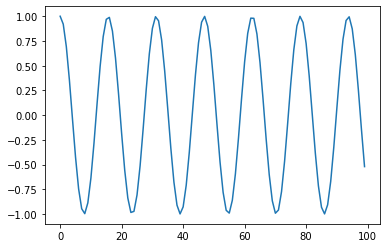

In [40]:
sol = np.cos(w1*t*20)
plt.plot(sol[:100])

print((2*np.pi)/w0)
print((2*np.pi)/w1)

print((8*np.pi)*20/.15)

In [24]:
# params
w0 = 0.5
w1 = 4.0
sigma0 = 10.0
sigma1 = 0.25

# define two modes
def phi1(x, y, t):
    return 1./np.cosh((x+1)/sigma0)/np.cosh((y-1)/sigma0)*np.cos(w0*t)

def phi2(x, y, t):
    return 1./(sigma1*np.sqrt(2*np.pi))*np.exp(-((x-1)**2+(y+1)**2)/(2*sigma1**2))*np.cos(w1*t + np.pi/4)

# mesh grids
n_train = 100
n_timesteps = 500
n_per_dim = 127

x = np.linspace(-5, 5, n_per_dim)
y = np.linspace(-5, 5, n_per_dim)
t = np.linspace(0, 8*np.pi, 5000)

dt = t[1] - t[0]

xgrid, ygrid, tgrid = np.meshgrid(x, y, t)

Phi = phi1(xgrid, ygrid, tgrid) + phi2(xgrid, ygrid, tgrid)
scaled_Phi = (Phi - Phi.min()) / (Phi.max() - Phi.min())
print("scaled_Phi.shape = ", scaled_Phi.shape)
np.save('../data/toy1/to_encode.npy', scaled_Phi)

ghjk

# stride_size = int(len(x)/n_per_dim)
# print("len x = ", len(x))
# print("stride_size = ", stride_size)
        
# op = torch.nn.Conv2d(1, 1, stride_size, stride=stride_size, padding=0)
# #averaging
# op.weight.data[0,0, :, :] = torch.ones(op.weight.data[0,0, :, :].size()) / (stride_size **2)

        
train_data = np.zeros((n_train, n_timesteps, n_per_dim, n_per_dim))
print(train_data.shape)
for i in range(n_train):
    t_start = np.random.rand()*4*np.pi
    print("i = ", i)
    t = np.linspace( t_start, t_start + (8*np.pi), 500) 
#     print("t shape = ", t.shape)
    
    xgrid, ygrid, tgrid = np.meshgrid(x, y, t)
#     t = t + 10*dt

    # data
    Phi = phi1(xgrid, ygrid, tgrid) + phi2(xgrid, ygrid, tgrid)
#     print("phi.shape = ", Phi.shape)
#     print(np.min(Phi))
#     print(Phi.max())
    scaled_Phi = (Phi - Phi.min()) / (Phi.max() - Phi.min())
#     print("scaled_Phi.shape = ", scaled_Phi.shape)
#     averaged  = op(torch.tensor(Phi.T).unsqueeze(1).float())
#     averaged = torch.flatten(averaged, start_dim=1, end_dim=-1)
#     Phi = torch.tensor(Phi.T).unsqueeze(1).float()
#     averaged = torch.flatten(Phi, start_dim=1, end_dim=-1)
#     print("Phi shape = ", scaled_Phi.T.shape)
#     print("train_data[i,:,:,:] shape = ", train_data[i,:,:,:].shape)
    train_data[i,:,:,:] = scaled_Phi.T#.detach().numpy()
#     ghjk
    
print(train_data.shape)
np.save('../data/toy1/to_encode.npy', train_data)

scaled_Phi.shape =  (127, 127, 5000)


NameError: name 'ghjk' is not defined

In [ ]:
print(train_data.shape)
np.save('../data/toy1/to_encode.npy', train_data)

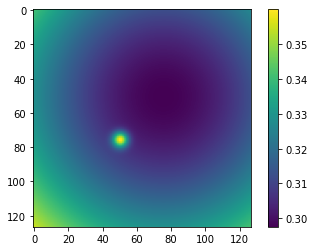

In [23]:
plt.imshow(train_data[2,0].reshape(n_per_dim, n_per_dim))
plt.colorbar()